In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/AQI_Data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [ ]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Option 1: Drop rows with missing values
df = df.dropna()

PM 2.5    1
dtype: int64


In [ ]:
# Select the relevant columns (assuming AQI is the target variable)
X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV','V','VM']]  # Features
y = df['PM 2.5']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict AQI values
y_pred = model.predict(X_test)

# Evaluating performance
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 3215.5806995442513
R-squared Score: 0.48658018157060867


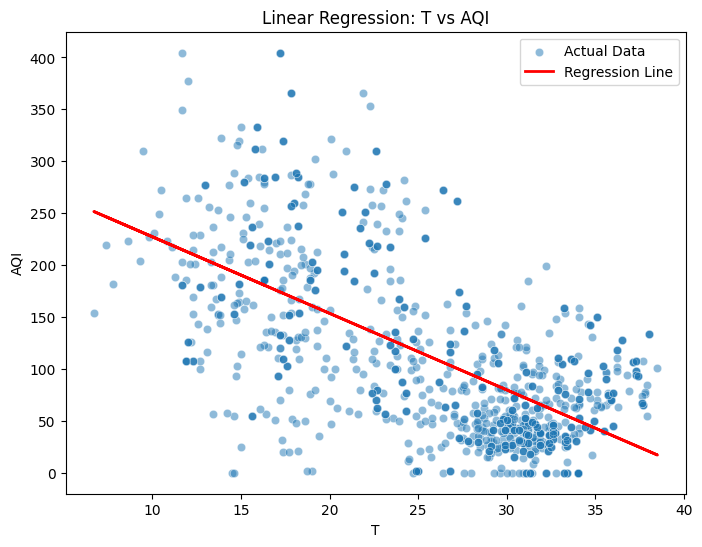

In [ ]:
#It's just for exploring the scatterplots to the given dataset(ex:T and PM 2.5)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

feature = 'T'  # You can change this to  'TM', 'Tm', 'SLP' etc.

# Reshape the feature for regression
X_feature = df[[feature]]
y_target = df['PM 2.5']

# Train a linear regression model for visualization
model = LinearRegression()
model.fit(X_feature, y_target)

# Predict AQI values
y_pred = model.predict(X_feature)

# Plot scatter and regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_feature[feature], y=y_target, alpha=0.5, label="Actual Data")
plt.plot(X_feature[feature], y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel(feature)
plt.ylabel("AQI")
plt.title(f"Linear Regression: {feature} vs AQI")
plt.legend()
plt.show()
